In [2]:
"""
KNN 相关的测试
"""

'\nKNN 相关的测试\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors

In [ ]:
w1 = np.random.randint(0, 30, (50, 2))
l1 = np.full((50), 0)
print(w1)


In [5]:
w2 = np.random.randint(15, 50, (50, 2))
l2 = np.full((50), 1)
print(w2)


[[15 30]
 [46 25]
 [17 28]
 [45 33]
 [30 42]
 [37 32]
 [20 27]
 [22 29]
 [37 26]
 [32 32]
 [28 38]
 [42 46]
 [28 29]
 [46 30]
 [28 33]
 [20 49]
 [25 26]
 [42 42]
 [40 19]
 [27 28]
 [24 43]
 [16 17]
 [31 38]
 [36 33]
 [30 42]
 [45 30]
 [18 26]
 [43 38]
 [15 49]
 [26 33]
 [33 31]
 [19 38]
 [23 34]
 [25 44]
 [43 49]
 [25 32]
 [27 28]
 [16 39]
 [28 21]
 [27 17]
 [49 37]
 [41 22]
 [48 20]
 [32 42]
 [45 28]
 [27 24]
 [33 28]
 [41 32]
 [20 40]
 [23 25]]


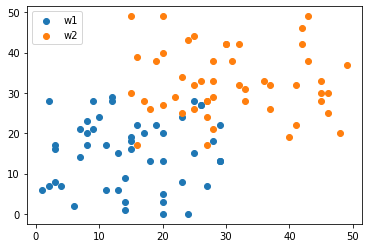

In [6]:
plt.figure()
plt.scatter(w1[:,0], w1[:,1])
plt.scatter(w2[:, 0], w2[:,1])
plt.legend(["w1", "w2"])
plt.show()

In [7]:
w = np.vstack((w1, w2))
l = np.hstack((l1, l2))

In [8]:
"""
普通的KNN
"""


'\n普通的KNN\n'

In [9]:
knn = neighbors.KNeighborsClassifier()
knn.fit(w, l)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
test = np.random.randint(0, 50, (1,2))
print(test)
print(knn.predict(test))

[[24 43]]
[1]


In [11]:
"""
剪辑近邻法
"""

'\n剪辑近邻法\n'

In [12]:
l = l.reshape(100, 1)
w_tmp = np.hstack((w, l))


In [13]:
np.random.shuffle(w_tmp)


In [14]:
w_test_size = int(len(w_tmp)/2)
w_test = w_tmp[0:w_test_size, :]
w_refer = w_tmp[w_test_size:, :]

knn = neighbors.KNeighborsClassifier(1)
knn.fit(w_refer[:, 0:2], w_refer[:, 2:].reshape(-1))

w_test_hat = knn.predict(w_test[:, 0:2])
w_test_corr = np.array(w_test_hat) == w_test[:,2:].reshape(-1)
print( np.array(w_test_hat) == w_test[:,2:].reshape(-1))
# print(np.delete(w_test, w_test_hat == w_test[:,2:0], 0).shape)
for i in range(w_test_size-1,-1,-1):
    print(i)
    if w_test_corr[i] == False:
        w_test = np.delete(w_test, i, 0)

print(w_test.shape)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True]
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(47, 3)


In [15]:
w_tmp= w_test[w_test[:, 2] == 0]
w1 = w_tmp[:,0:2]

w_tmp= w_test[w_test[:, 2] == 1]
w2 = w_tmp[:,0:2]

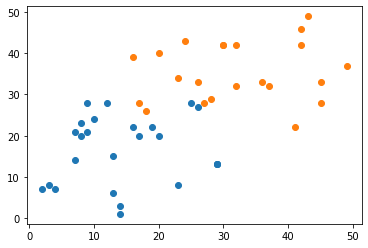

In [16]:
plt.figure()
plt.scatter(w1[:, 0], w1[:, 1])
plt.scatter(w2[:, 0], w2[:, 1])
plt.show()



In [17]:
"""
多次迭代剪辑近邻法
"""

'\n多次迭代剪辑近邻法\n'

In [18]:
l = l.reshape(100, 1)
w_tmp = np.hstack((w, l))
while True:

    np.random.shuffle(w_tmp)

    w_test_size = int(len(w_tmp)/2)
    w_test = w_tmp[0:w_test_size, :]
    w_refer = w_tmp[w_test_size:, :]

    knn = neighbors.KNeighborsClassifier(1)
    knn.fit(w_refer[:, 0:2], w_refer[:, 2:].reshape(-1))

    w_test_hat = knn.predict(w_test[:, 0:2])
    w_test_corr = np.array(w_test_hat) == w_test[:,2:].reshape(-1)
    print( np.array(w_test_hat) == w_test[:,2:].reshape(-1))
    # print(np.delete(w_test, w_test_hat == w_test[:,2:0], 0).shape)
    has_change = False
    for i in range(w_test_size-1,-1,-1):
        print(i)
        if w_test_corr[i] == False:
            w_test = np.delete(w_test, i, 0)
            has_change = True

    print(w_test.shape)

    if has_change == False:
        break
    w_tmp = w_test

print(w_test)

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(46, 3)
[False  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True False  True  True  True]
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(20, 3)
[ True  True  True  True  True  True  True False  True  True]
9
8
7
6
5
4
3
2
1
0
(9, 3)
[ True  True  True  True]
3
2
1
0
(4, 3)
[[45 30  1]
 [18 13  0]
 [36 33  1]
 [24  0  0]]


In [19]:
w_tmp= w_test[w_test[:, 2] == 0]
w1 = w_tmp[:,0:2]

w_tmp= w_test[w_test[:, 2] == 1]
w2 = w_tmp[:,0:2]

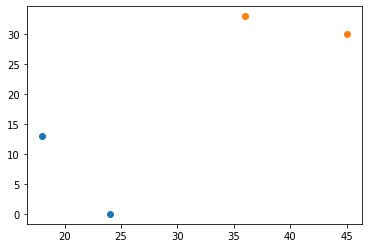

In [20]:
plt.figure()
plt.scatter(w1[:, 0], w1[:, 1])
plt.scatter(w2[:, 0], w2[:, 1])
plt.show()



In [21]:
"""
压缩近邻法
"""

'\n压缩近邻法\n'